## Introduction

### 1) Acquisition and Understanding of the Dataset
The dataset that was used for the data analysis and prediction is Loan_status_2007-2020Q3.gzip . It was retrieved from Lending Club Datasets and sourced in the Kaggle Website. **LendingClub** is a peer to peer lending company of American Origin (McBride & Sarah, 2014). At its peak, it was considred the world's largest lending company (Schumpeter, 2013). The dataset consists of all the loan attributes recorded by the lending company. The descriptions of all the stats are mentioned in the LCDataDictionary.xlsx . We will manily focus on the loan status of the borrower as our target variable or outcome, for the purpose of classification and prediction, all the other loan attributes will act as the features on which the model will be trained.

Source of the dataset: https://www.kaggle.com/code/jkashish18/lending-club-python/data

Here, in this notebook we will perform extensive **data cleaning** and **preprocessing** as this a big data consisting of lots of information.
After the cleaning is done, **descriptive analysis** will be done on it, through visualisation in the exploratory analysis section. It will be done, in the form of histograms, bar plots and piechart of the value counts of certain attributes and comparision plots, with the help of libraries such as seaborn and matplotlib. After that, **diagnostic analysis** will be done using correlation method among many others. These are also mentioned in the exploratory analysis section. **Predictive analysis** will be conducted in the form of a binary classification, which will classify whether the borrower has charged off as its loan status or is it fully paid. The classifier used for this purpose would be Decision Tree Classifier. Confusion matrix, f1 score and accuracy are some of the metrics that will be used for the evaluation of the model performance. At the end a feature importance plot is also given which states which loan attribute plays the best role for predicting the loan status of the borrower.

## 2) Storage of the Dataset
 
The dataset will usually be stored in a local resource, but in case the need arises to store the dataset in a cloud based system. The following measures need to be taken.
First we need to choose an appropriate cloud storage provider such as Google Cloud, Dropbox, Amazon S3, Oracle Cloud storage etc. After that is sorted, we would have to create an account and configure the storage options present to meet the specific requirements. Once the cloud based storage is set up, it is time to transfer the dataset from the local storage to the cloud. This may involve exporting the data in a suitable format for the proper storage and future utilisation.
Finally, the data analysis and processing workflows need  to be adjusted to account for the new cloud based storage location, by changing the location of the filepath of the dataset and any other means. In this way, we would be able to work with datasets that are stored in cloud.

## 3) Analysis 
The analysis has been done below.



## Importing necessary libraries

In [27]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Loan_status_2007-2020Q3.gzip", low_memory=False)
df.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [3]:
df.shape #Clearly there are way too many columns. We are gonna drop some columns(features) by implementing several constrictions

(2925493, 142)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Columns: 142 entries, Unnamed: 0 to debt_settlement_flag
dtypes: float64(106), int64(1), object(35)
memory usage: 3.1+ GB


In [5]:
df.describe()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
count,2.925493e+06,2.925492e+06,2.925492e+06,2.925492e+06,2.925492e+06,2.925488e+06,2.922384e+06,2.925463e+06,2.925492e+06,2.925492e+06,...,197824.000000,197824.000000,197824.000000,143638.000000,182076.000000,143638.000000,143637.000000,179240.000000,182076.000000,182076.000000
mean,8.697419e+04,1.535878e+04,1.535470e+04,1.534005e+04,4.523914e+02,7.993727e+04,1.929648e+01,2.897012e-01,7.005110e+02,7.045112e+02,...,12.544398,0.038327,0.067545,2.233427,119.887400,2.233427,2.323148,369.367460,11993.128927,745.504875
std,8.048842e+04,9.478383e+03,9.477145e+03,9.480634e+03,2.729478e+02,1.117476e+05,1.571977e+01,8.436819e-01,3.376565e+01,3.376653e+01,...,8.206977,0.362390,0.371836,0.565689,247.522976,0.565689,6.179453,468.696526,9162.902724,2095.316599
min,0.000000e+00,5.000000e+02,5.000000e+02,0.000000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,6.140000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.284100e+04,8.000000e+03,8.000000e+03,8.000000e+03,2.535000e+02,4.700000e+04,1.208000e+01,0.000000e+00,6.750000e+02,6.790000e+02,...,7.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,104.280000,4749.142500,259.040000
50%,6.892500e+04,1.300000e+04,1.300000e+04,1.300000e+04,3.823000e+02,6.600000e+04,1.810000e+01,0.000000e+00,6.950000e+02,6.990000e+02,...,11.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,249.474420,9967.160000,423.200000
75%,1.072940e+05,2.000000e+04,2.000000e+04,2.000000e+04,6.039200e+02,9.500000e+04,2.488000e+01,0.000000e+00,7.200000e+02,7.240000e+02,...,17.000000,0.000000,0.000000,2.000000,101.940000,2.000000,0.000000,482.532500,17640.670000,679.580000
max,4.210940e+05,4.000000e+04,4.000000e+04,4.000000e+04,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,8.500000e+02,...,121.000000,21.000000,23.000000,4.000000,2797.500000,4.000000,82.000000,11581.820000,42135.550000,40270.980000


In [6]:
df.isnull().sum()

Unnamed: 0                                          0
id                                                  0
loan_amnt                                           1
funded_amnt                                         1
funded_amnt_inv                                     1
                                               ...   
hardship_loan_status                          2782082
orig_projected_additional_accrued_interest    2746253
hardship_payoff_balance_amount                2743417
hardship_last_payment_amount                  2743417
debt_settlement_flag                                1
Length: 142, dtype: int64

In [7]:
df['loan_status'].value_counts()

Fully Paid                                             1497783
Current                                                1031016
Charged Off                                             362548
Late (31-120 days)                                       16154
In Grace Period                                          10028
Late (16-30 days)                                         2719
Issued                                                    2062
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                    433
Name: loan_status, dtype: int64

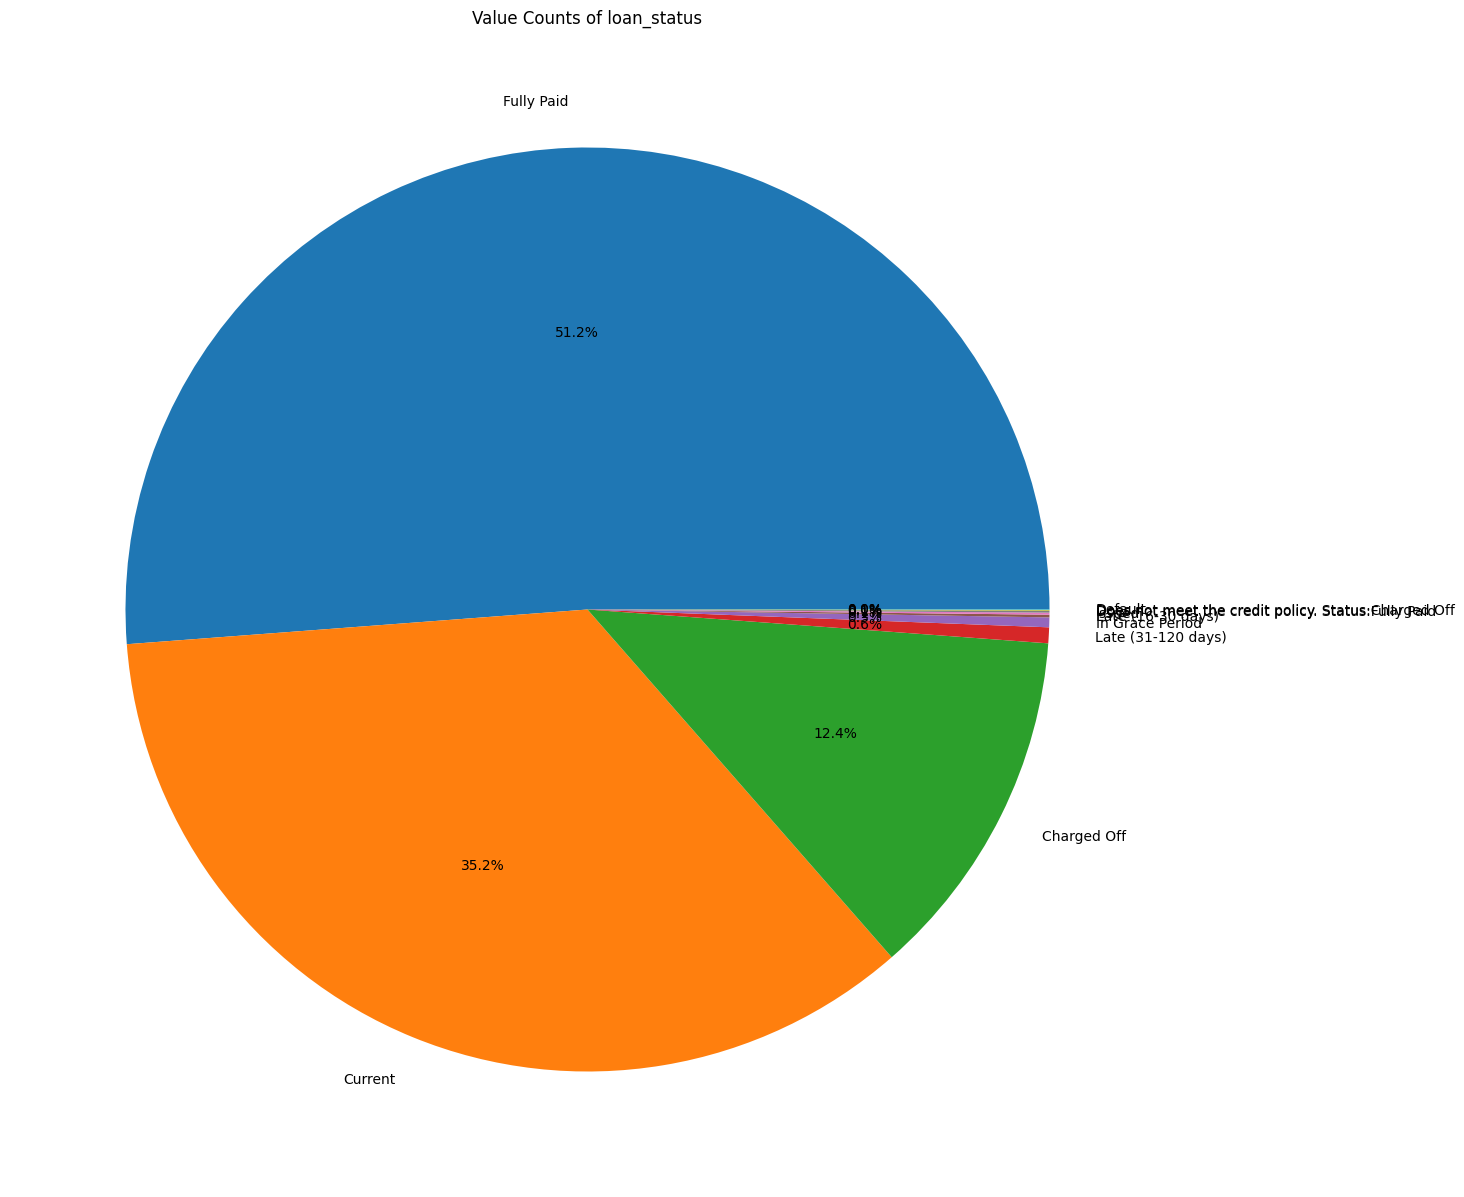

In [8]:
counts = df['loan_status'].value_counts()
plt.figure(figsize=(30,15))
plt.title('Value Counts of loan_status')
plt.pie(counts, labels=counts.index, autopct='%.1f%%')
plt.show()

## Preprocessing : Dropping columns having lots of data missing

In [9]:
missing_data = df.isnull().mean().sort_values(ascending=False)
missing_data.head()

hardship_loan_status    0.950979
hardship_reason         0.950903
hardship_status         0.950902
hardship_dpd            0.950902
hardship_type           0.950901
dtype: float64

Text(0, 0.5, 'Feature count')

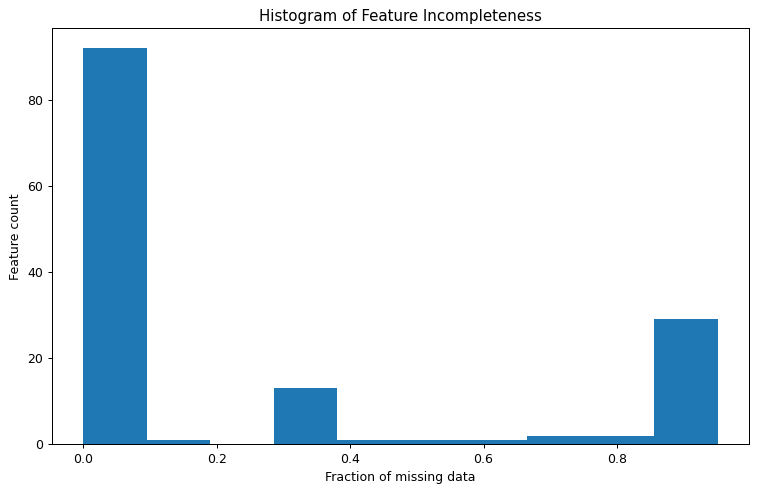

In [10]:
plt.figure(figsize=(10,6), dpi=90)
missing_data.plot.hist()
plt.title('Histogram of Feature Incompleteness')
plt.xlabel('Fraction of missing data')
plt.ylabel('Feature count')

In [11]:
drop_list = sorted(list(missing_data[missing_data > 0.6].index)) #listing columns having more than 60 percent of missing data
print(drop_list)
print("Drop Features: ", len(drop_list))

['annual_inc_joint', 'deferral_term', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_num_rev_accts', 'sec_app_open_acc', 'sec_app_open_act_il', 'sec_app_revol_util', 'verification_status_joint']
Drop Features:  34


In [12]:
df.drop(labels=drop_list, axis=1, inplace=True) #dropping columns having more than 60 percent of data
df.shape

(2925493, 108)

In [13]:
df['loan_status'].shape

(2925493,)

In [14]:
df['Charged_Off'] = df.loan_status.map({'Fully Paid':0,'Charged Off':1,'Current':0,'Late (31-120 days)':0,'In Grace Period':0,'Late (16-30 days)':0,'Issued':0,'Does not meet the credit policy. Status:Fully Paid':0,'Does not meet the credit policy. Status:Charged Off':0,'Default':0}) #creating a target column using 0 in case of fully paid and 1 in case of charged off
df[['loan_status', 'Charged_Off']].head(15)

,loan_status,Charged_Off
0,Fully Paid,0.0
1,Charged Off,1.0
2,Fully Paid,0.0
3,Fully Paid,0.0
4,Fully Paid,0.0
5,Fully Paid,0.0
6,Fully Paid,0.0
7,Fully Paid,0.0
8,Charged Off,1.0
9,Charged Off,1.0


In [15]:
df['Charged_Off'].shape

(2925493,)

In [28]:
df.corr()['Charged_Off'].sort_values(ascending=False).dropna() #Now we check for features most relevant to charged off status using correlation method

Charged_Off                1.000000
recoveries                 0.534362
collection_recovery_fee    0.515983
total_rec_late_fee         0.107442
acc_open_past_24mths       0.091456
                             ...   
out_prncp_inv             -0.202922
out_prncp                 -0.202936
total_rec_prncp           -0.230003
last_fico_range_low       -0.554975
last_fico_range_high      -0.602767
Name: Charged_Off, Length: 83, dtype: float64

In [17]:
features_selected = ['Charged_Off','recoveries','collection_recovery_fee', 'total_rec_late_fee', 'inq_last_6mths', 'pub_rec', 'pub_rec_bankruptcies', 'loan_amnt', 'funded_amnt', 'dti', 'id', 'funded_amnt_inv', 'delinq_2yrs', 'installment', 'open_acc', 'total_acc', 'annual_inc', 'fico_range_high', 'fico_range_low', 'last_pymnt_amnt', 'total_pymnt', 'total_pymnt_inv','total_rec_prncp', 'last_fico_range_low', 'last_fico_range_high']
len(features_selected)

25

In [18]:
#So we have the new dataframe with the selected features
df2 = df.loc[:, ['Charged_Off','recoveries','collection_recovery_fee', 'total_rec_late_fee', 'inq_last_6mths', 'pub_rec', 'pub_rec_bankruptcies', 'loan_amnt', 'funded_amnt', 'dti', 'id', 'funded_amnt_inv', 'delinq_2yrs', 'installment', 'open_acc', 'total_acc', 'annual_inc', 'fico_range_high', 'fico_range_low', 'last_pymnt_amnt', 'total_pymnt', 'total_pymnt_inv','total_rec_prncp', 'last_fico_range_low', 'last_fico_range_high']]

In [19]:
df2.shape

(2925493, 25)

## Further Cleaning

In [20]:
df2.isnull().sum()

Charged_Off                   1
recoveries                    1
collection_recovery_fee       1
total_rec_late_fee            1
inq_last_6mths               31
pub_rec                      30
pub_rec_bankruptcies       1366
loan_amnt                     1
funded_amnt                   1
dti                        3109
id                            0
funded_amnt_inv               1
delinq_2yrs                  30
installment                   1
open_acc                     30
total_acc                    30
annual_inc                    5
fico_range_high               1
fico_range_low                1
last_pymnt_amnt               1
total_pymnt                   1
total_pymnt_inv               1
total_rec_prncp               1
last_fico_range_low           1
last_fico_range_high          1
dtype: int64

In [21]:
df2.dropna(inplace=True) #dropping any remaining null values
df2.isnull().sum()

Charged_Off                0
recoveries                 0
collection_recovery_fee    0
total_rec_late_fee         0
inq_last_6mths             0
pub_rec                    0
pub_rec_bankruptcies       0
loan_amnt                  0
funded_amnt                0
dti                        0
id                         0
funded_amnt_inv            0
delinq_2yrs                0
installment                0
open_acc                   0
total_acc                  0
annual_inc                 0
fico_range_high            0
fico_range_low             0
last_pymnt_amnt            0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
last_fico_range_low        0
last_fico_range_high       0
dtype: int64

In [22]:
df2.duplicated().sum() #no duplicates

0

In [23]:
df2.shape

(2921018, 25)

In [29]:
df2.to_csv("cleaned_dataset", index=False)

## Exploratory Data Analysis

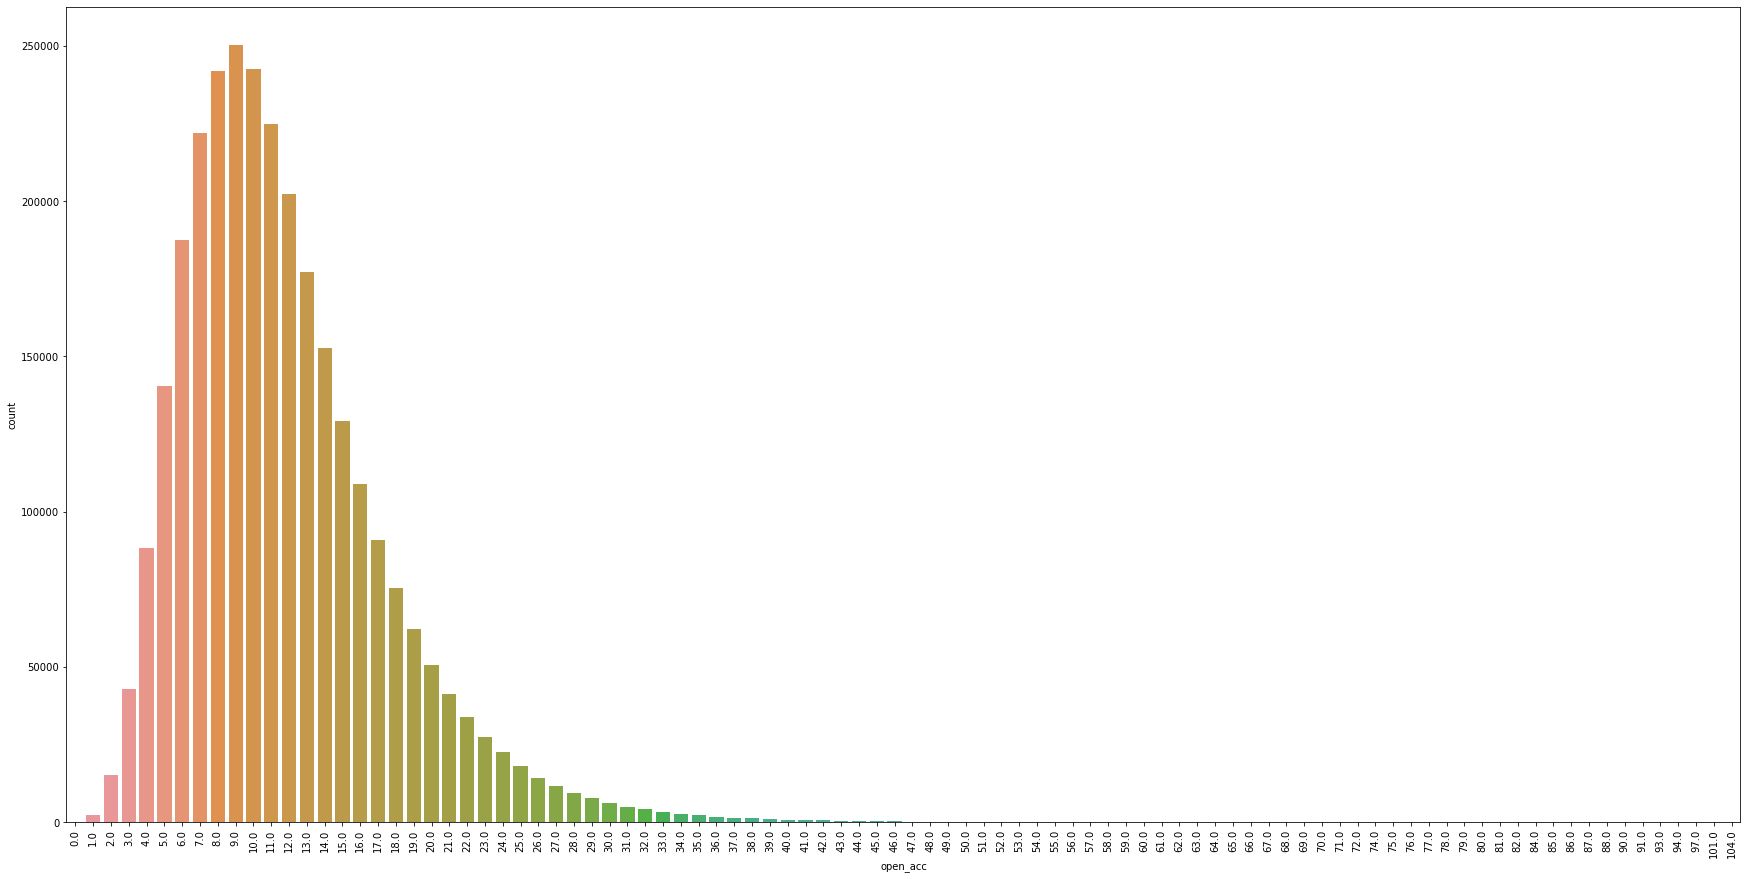

In [24]:
plt.figure(figsize=(30,15)) #plotting the graph for open_acc value count
plt.xticks(rotation=90)
ax = sns.countplot(x="open_acc", data=df)

Text(0.5, 1.0, 'Loan Status Bar Plot')

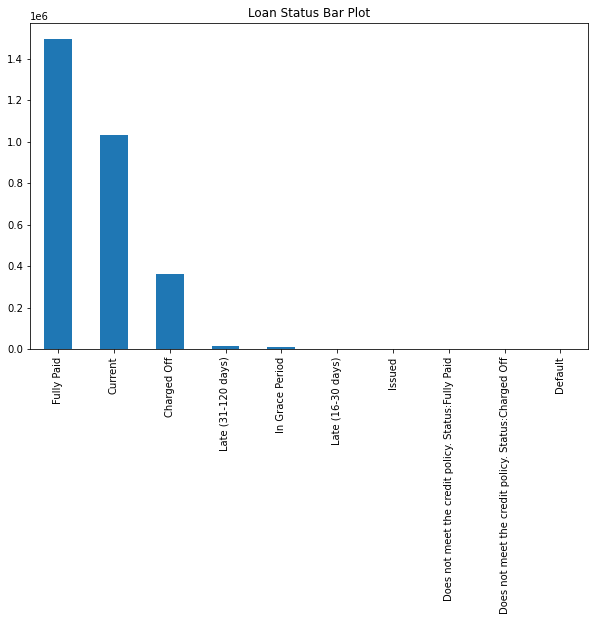

In [25]:
plt.figure(figsize=(10,6))
df.loan_status.value_counts().plot.bar()
plt.title('Loan Status Bar Plot')

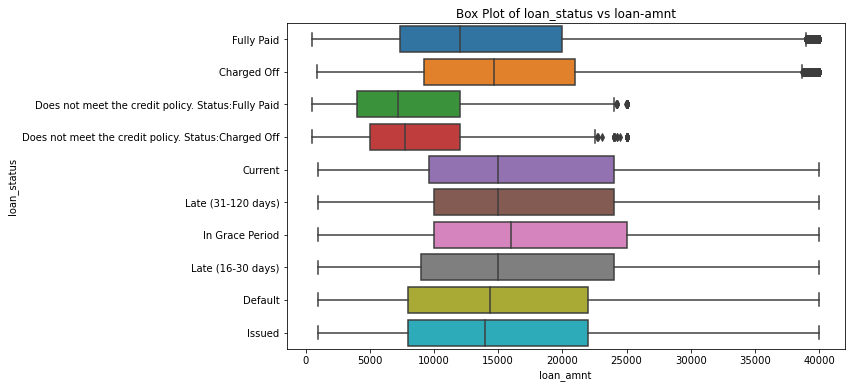

In [26]:
#Plotting the graph against the loan amount and loan status.
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_amnt', y='loan_status', data=df)
plt.title('Box Plot of loan_status vs loan-amnt')
plt.show()


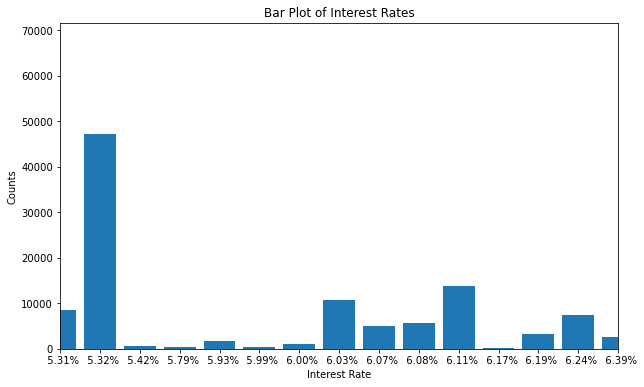

In [27]:
value_counts = df['int_rate'].value_counts().sort_index() #Plotting the graph of interest rates counts
plt.figure(figsize=(10,6))
plt.bar(value_counts.index, value_counts.values)
plt.title('Bar Plot of Interest Rates')
plt.xlabel('Interest Rate')
plt.ylabel('Counts')
plt.xlim(0, 14)
plt.show()

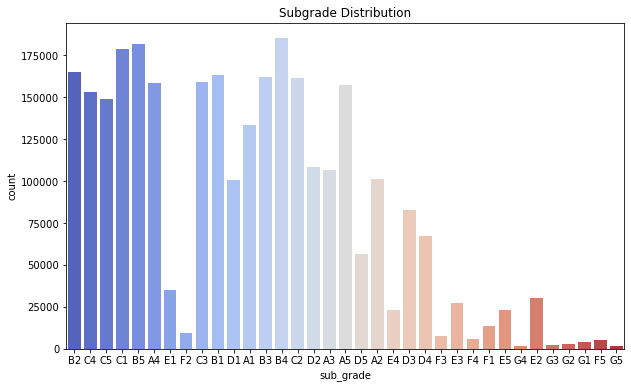

In [28]:
plt.figure(figsize=(10,6)) #Plotting Subgrade Distribution
sns.countplot(x='sub_grade',data=df, palette='coolwarm')
plt.title('Subgrade Distribution');

In [29]:
# converting emp_length to integer for better indexing and training
emp_len_map = {
    '< 1 year' : 0,
    '1 year' : 1, 
    '2 years' : 2,
    '3 years' : 3, 
    '4 years' : 4,
    '5 years' : 5, 
    '6 years' : 6, 
    '7 years' : 7, 
    '8 years' : 8,
    '9 years' : 9, 
   '10+ years': 10,
}
df_emp = df.dropna(subset=['emp_length']) #to deal with nan values
df_emp['emp_length'] = df_emp.apply(lambda r: emp_len_map[r.emp_length], axis=1)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_8460\351678684.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emp['emp_length'] = df_emp.apply(lambda r: emp_len_map[r.emp_length], axis=1)


Text(0.5, 1.0, 'emp_length Distribution')

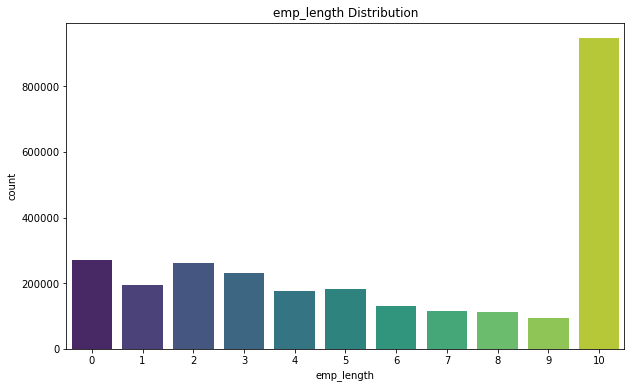

In [30]:
plt.figure(figsize=(10,6)) #Plotting emp_length distribution
vc = df_emp['emp_length'].value_counts().sort_index()
sns.countplot(x='emp_length',data=df_emp, order =vc.index, palette='viridis')
plt.title('emp_length Distribution')

Text(0.5, 1.0, 'Debt to income Ratio Plot')

<Figure size 900x540 with 0 Axes>

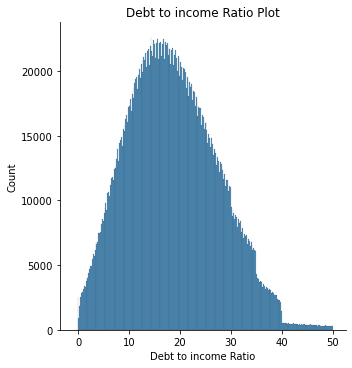

In [31]:
plt.figure(figsize=(10,6), dpi=90) #plotting the dti (debt to income ratio)
sns.displot(df.loc[df['dti'].notnull() & (df['dti']<50), 'dti'], kde=False)
plt.xlabel('Debt to income Ratio')
plt.ylabel('Count')
plt.title('Debt to income Ratio Plot')

Text(0.5, 1.0, 'Feature Correlation')

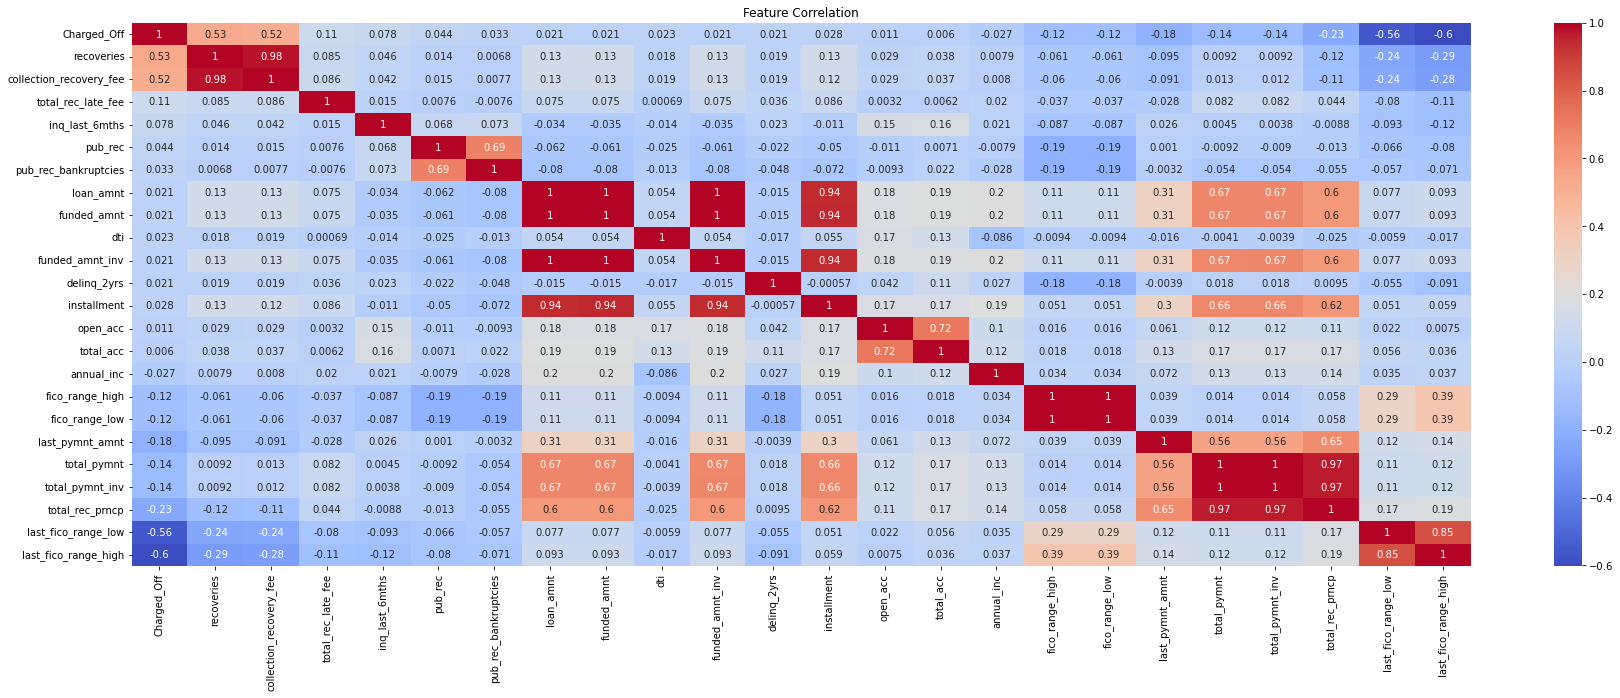

In [32]:
plt.figure(figsize=(30,10)) #Plotting heatmap of the Correlation of all the features
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')

In [33]:
# It is clearly visible that there are some strong correlations betwee multile features.
# We need to drop some of these highly correlated features as the model can get biased by this strong correlations.
# funded_amnt has very high correlation with loan_amnt, so we drop funded_amnt
# 
# collection_recovery_fee has very high correlation with recoveries, so we drop collection_recovery_fee
# total_pymnt has very high correlation with total_pymnt_inv, so we drop total_pymnt_inv
# loan_amnt has very high correlation with funded_amnt, so we drop funded_amnt
# fico_range_high has very high correlation with fico_range_low, so we drop fico_range_low
# funded_amnt_inv has very high correlation with loan_amnt, so we drop funded_amnt_inv
# total_rec_prncp has very high correlation with both total_paymnt, so we drop total_rec_prncp

df2.drop(['funded_amnt_inv','total_pymnt_inv','funded_amnt','collection_recovery_fee','total_rec_prncp','fico_range_low'],axis=1,inplace=True)


## More preprocessing

Performing Feature Scaling

In [34]:
df2.shape

(2921018, 19)

In [35]:
df2.isnull().sum()
df2.dropna(inplace=True)

In [36]:
df2.shape

(2921018, 19)

In [37]:
target = df2['Charged_Off'] #setting up the target variable
numeric_features = df2.select_dtypes(exclude=['object', 'category'])
numeric_features = numeric_features.drop('Charged_Off', axis = 1) #dropping the Charged Off column, as we don't want that to be scaled.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled = sc.fit_transform(numeric_features)

In [38]:
target = target.astype(int) #Checking target variable
print(target.shape)
target.head()

(2921018,)


0    0
1    1
2    0
3    0
4    0
Name: Charged_Off, dtype: int32

In [39]:
numeric_features.columns

Index(['recoveries', 'total_rec_late_fee', 'inq_last_6mths', 'pub_rec',
       'pub_rec_bankruptcies', 'loan_amnt', 'dti', 'delinq_2yrs',
       'installment', 'open_acc', 'total_acc', 'annual_inc', 'fico_range_high',
       'last_pymnt_amnt', 'total_pymnt', 'last_fico_range_low',
       'last_fico_range_high'],
      dtype='object')

In [48]:
scaled_features = pd.DataFrame(scaled, columns=['recoveries', 'total_rec_late_fee', 'inq_last_6mths', 'pub_rec',
       'pub_rec_bankruptcies', 'loan_amnt', 'dti', 'delinq_2yrs',
       'installment', 'open_acc', 'total_acc', 'annual_inc', 'fico_range_high',
       'last_pymnt_amnt', 'total_pymnt', 'last_fico_range_low',
       'last_fico_range_high'], index= numeric_features.index)
scaled_features.head()

,recoveries,total_rec_late_fee,inq_last_6mths,pub_rec,pub_rec_bankruptcies,loan_amnt,dti,delinq_2yrs,installment,open_acc,total_acc,annual_inc,fico_range_high,last_pymnt_amnt,total_pymnt,last_fico_range_low,last_fico_range_high
0,-0.201290,-0.127194,0.521523,-0.336286,-0.347426,-1.092993,0.531112,-0.343456,-1.060835,-1.513934,-1.244376,-0.501202,1.022109,-0.539448,-0.650346,0.194324,0.182313
1,-0.056005,-0.127194,5.195058,-0.336286,-0.347426,-1.356830,-1.163992,-0.343456,-1.438462,-1.513934,-1.658429,-0.447530,1.170241,-0.547920,-1.120025,-5.945083,-2.559228
2,-0.201290,-0.127194,1.689907,-0.336286,-0.347426,-1.367384,-0.672952,-0.343456,-1.348673,-1.688357,-1.161566,-0.606293,1.022109,-0.461461,-0.927147,0.501294,0.650381
3,-0.201290,1.097262,0.521523,-0.336286,-0.347426,-0.565317,0.044525,-0.343456,-0.414208,-0.292975,1.074316,-0.275778,-0.311086,-0.509143,-0.033416,-0.682734,-1.155024
4,-0.201290,-0.127194,-0.646861,-0.336286,-0.347426,-1.304063,-0.086504,-0.343456,-1.409290,0.579139,1.157127,-0.000259,-0.162953,-0.556458,-0.824346,0.018912,-0.085154


In [49]:
df2.select_dtypes(['object', 'category']).info()
df2.select_dtypes(['object', 'category'])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2921018 entries, 0 to 2925492
Data columns (total 1 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      object
dtypes: object(1)
memory usage: 44.6+ MB


,id
0,1077501
1,1077430
2,1077175
3,1076863
4,1075358
...,...
2925488,102556443
2925489,102653304
2925490,102628603
2925491,102196576


In [50]:
# df2 dataframe has only one categorical value having object datatype.
#The 'id' is just an unique assigned ID, which will not play any significant role in the prediction process.
#So there is no need of One Hot Encoding of that column.

In [51]:
scaled_features.shape  #These are our predictor variables

(2921018, 17)

In [52]:
target.shape #These are our target variables

(2921018,)

Creating Train_Test Split

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

X = scaled_features
Y = target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, shuffle=True, random_state=42)


In [54]:
X.shape


(2921018, 17)

In [55]:
Y.shape

(2921018,)

Best parameters: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train score:  0.9747532323924797
Test score:  0.9745790853879809
f1 score:  0.9743432145483056
Accuracy:  0.9745790853879809


Text(33.0, 0.5, 'Actual')

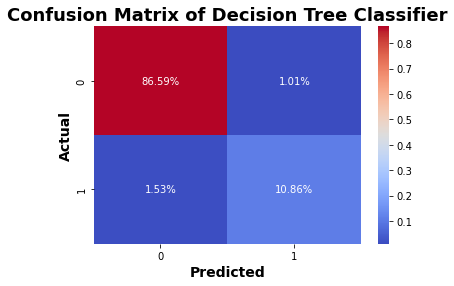

In [56]:
# Creating a Decision Tree Classifier object
dt = DecisionTreeClassifier()

# Defining the parameter grid 
parameters = {'max_depth': [2, 4, 6, 8],
          'min_samples_split': [2, 5, 10, 15],
          'min_samples_leaf': [1, 2, 4, 8]}


grid_search = GridSearchCV(dt, param_grid = parameters, cv=5)

# Fitting the GridSearchCV object to the dataset
grid_search.fit(X, Y)

# Printing the best parameters 
print("Best parameters:", grid_search.best_params_)

#getting associated grid score
train_score = grid_search.score(X_train, Y_train)
test_score = grid_search.score(X_test, Y_test)

Y_pred = grid_search.predict(X_test)

# Computing accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
f1_score_dt = f1_score(Y_test, Y_pred, average='weighted')

#Printing the scores
print("Train score: ", train_score)
print("Test score: ", test_score)
print("f1 score: ", f1_score_dt)
print("Accuracy: ", accuracy)

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='coolwarm')
plt.title('Confusion Matrix of Decision Tree Classifier', fontweight='bold', fontsize=18)
plt.xlabel('Predicted', fontweight='bold', fontsize=14)
plt.ylabel('Actual', fontweight='bold', fontsize=14)

Feature Importance Plot

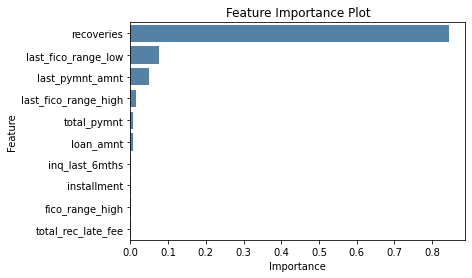

In [57]:
best_estimator = grid_search.best_estimator_ #getting the best features trough best attribute method
importance_fraction = best_estimator.feature_importances_

# creating a dataframe having feature names and their corresponding importance fraction
feat_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importance_fraction})

# sorting the dataframe by importance in descending order
feat_importances = feat_importances.sort_values('Importance', ascending=False)

# visualizing the important features using a horizontal barplot
sns.barplot(x='Importance', y='Feature', data=feat_importances[:10], color="steelblue")
plt.title('Feature Importance Plot')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## 4) Recommendation/Conclusion 
Explorataory Analysis of the dataset gave us many insights on the various relationships among the loan attributes. The Decision Tree Classifier used for the prediction of loan status of the borrower showed a training score of 0.9747 and a testing score of 0.9745. Both of the score is quite high and similar, which suggests that the model is likely not overfitting to the training data. The Confusion Matrix generated after the classification shows a 1.01 % of false positive and a 1.53 % of False Negative. The f1 score and accuracy of the prediction is 0.9743 and 0.9745 respectively.
GridsearchCV was used to find the best hyperparameters for the Decision Tree Classifier which was {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2} in this case. The feature plot was drawn using the best_parameter function of the grid search. 

Even though Decision Tree Classifier showed a pretty good result,it would be recommended to use other classifers and check on how it works out, when a different algorithm is used for the classification. It can then be compared with the result we already have. 

Data profiling from Pandas Library was not used here. It would be interesting to use that for the exploratory analysis as well in the future.

## References 
McBride, Sarah (December 4, 2014). "AvantCredit Raises $225 Million From Tiger Global, Peter Thiel". Business Insider. United States. Business Insider Inc. Retrieved January 25, 2017.

Schumpeter Peer review The Economist January 5, 2013; Accessed March 22, 2013.
